Nadia AHMED

# TP : Expérimentation avec ElasticSearch

## 1. PARTIE INDEXAGE

### a) Indexation de deux fichiers JSON :  

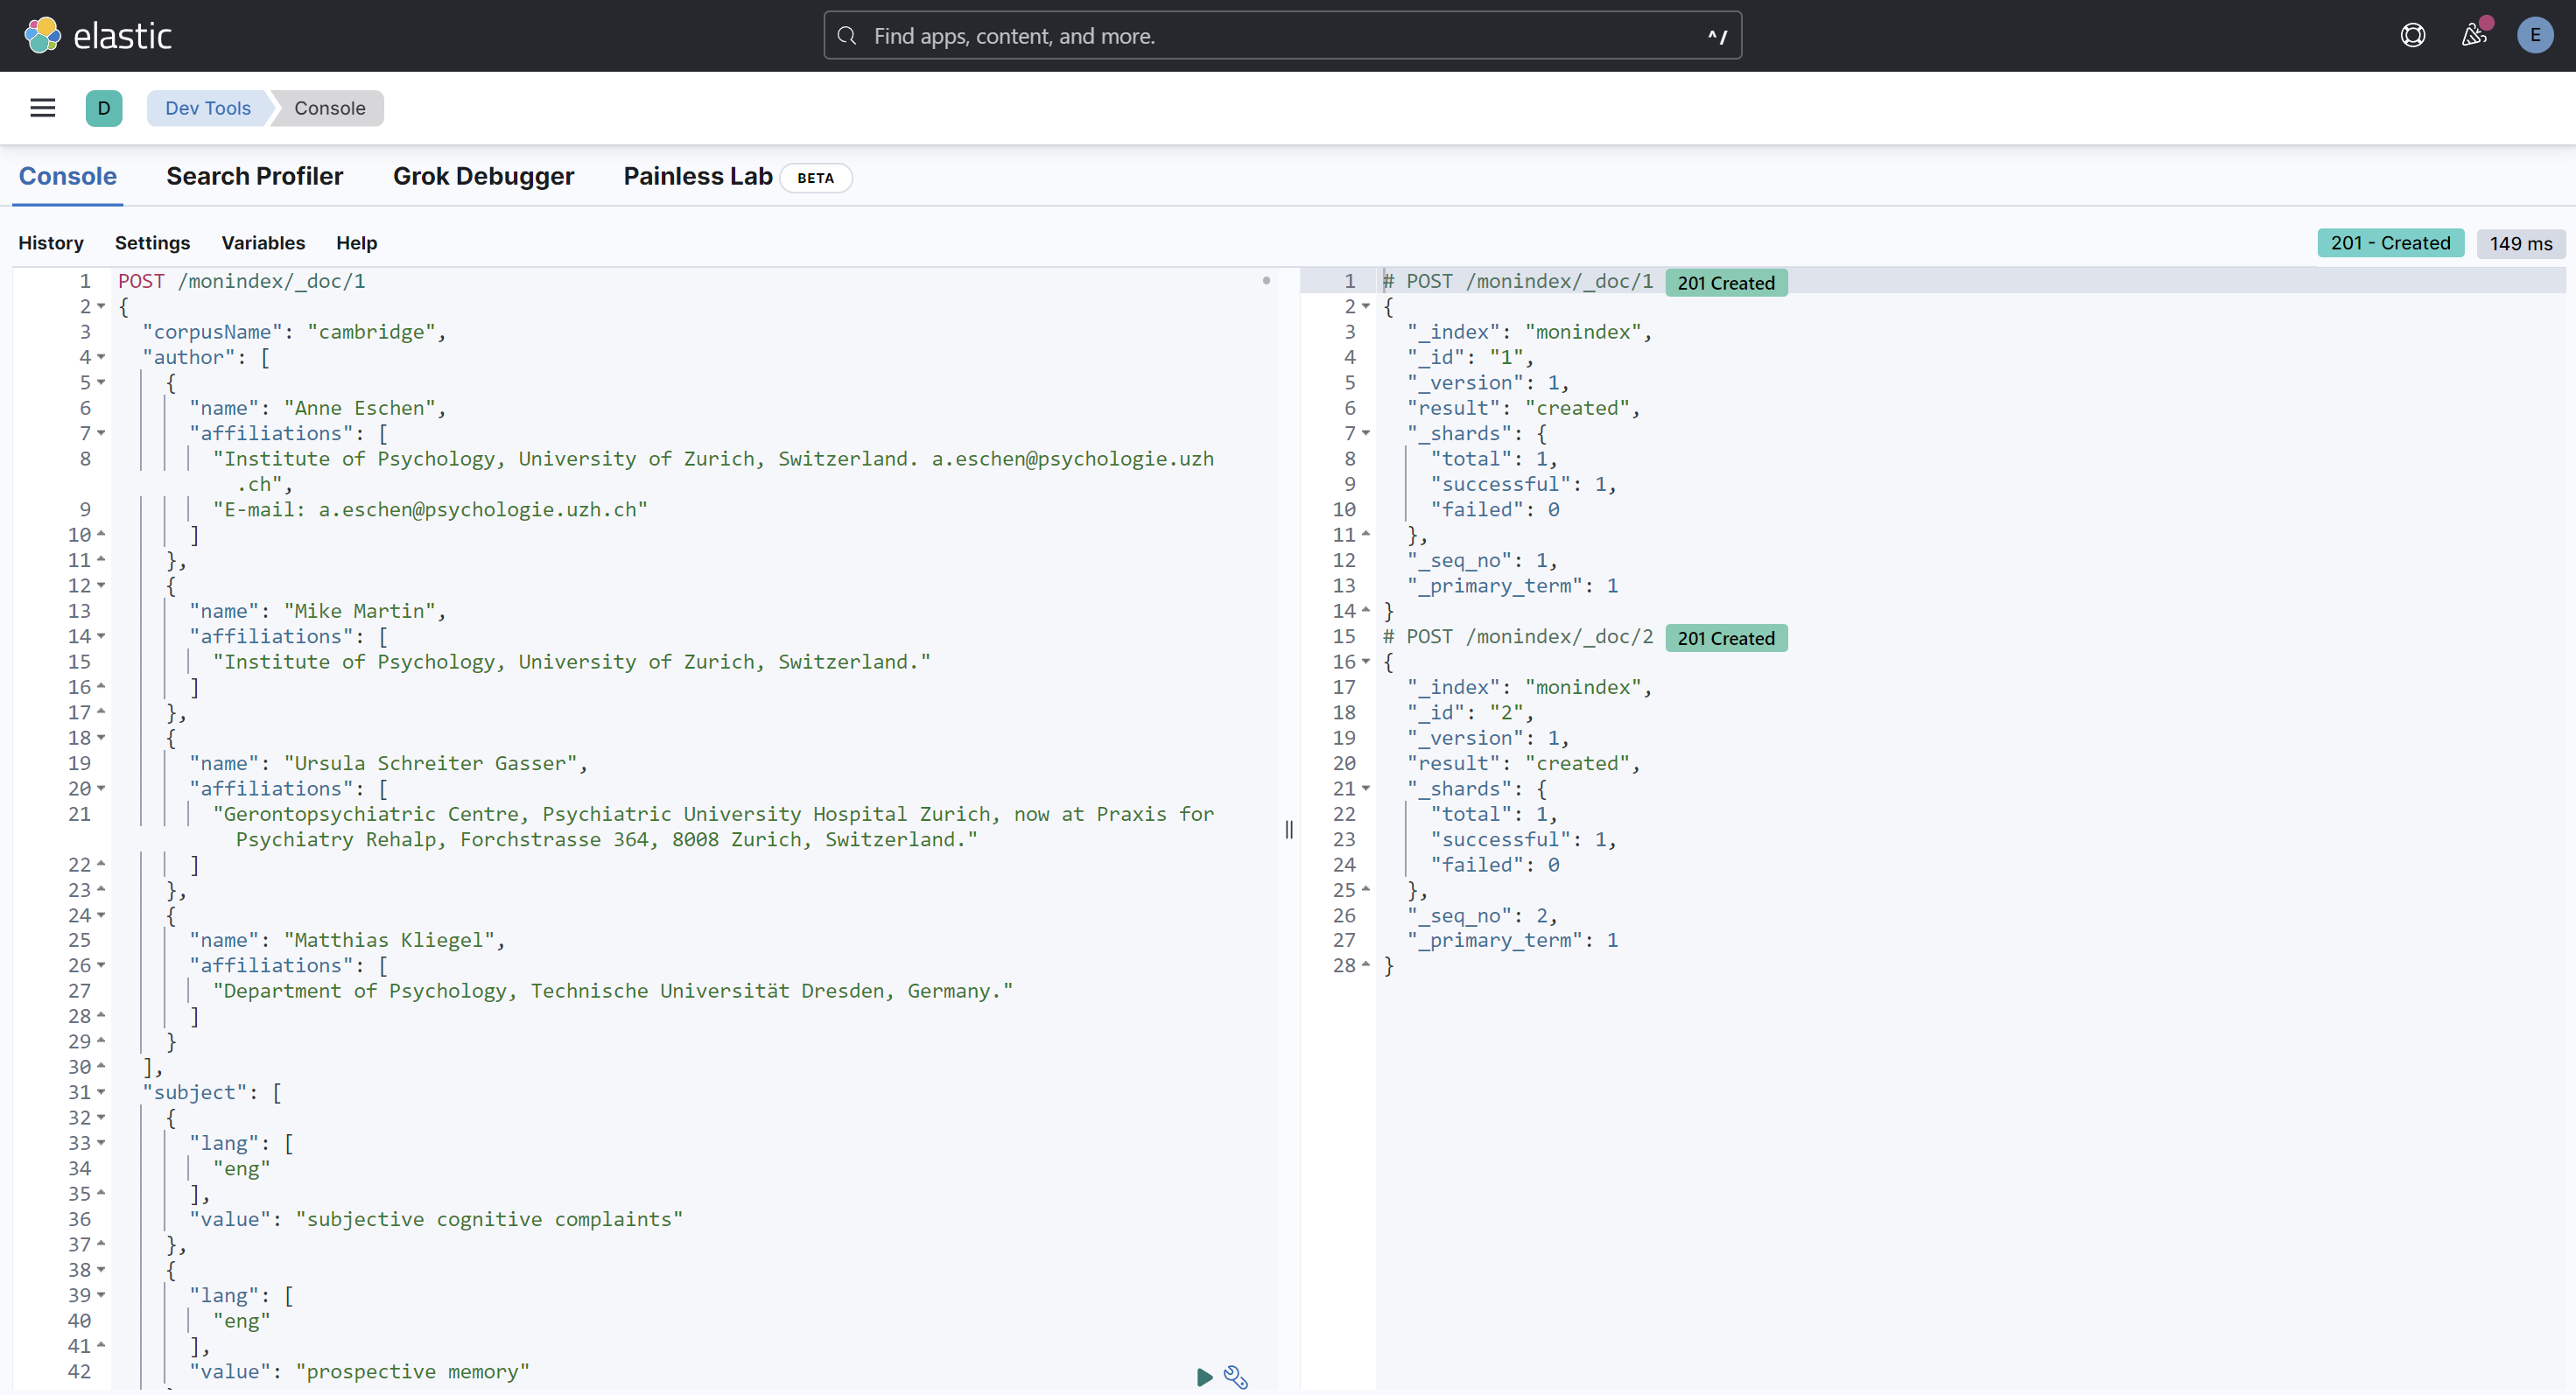

In [17]:
from IPython.display import Image, display

display(Image(filename='Indexation_deux_fichiers.png'))

## 2. PARTIE REQUÊTAGE : 

### a) Recherche du nombre total de documents dans l'index :

In [32]:
result = es.search(index='my_index', body={"query": {"match_all": {}}})
total_documents = result['hits']['total']['value']
print(f"Nombre total de document dans l'index : {total_documents}")

Nombre total de document dans l'index : 100


### b) Recherche des 5 premiers documents dans l'index :

In [31]:
result = es.search(index='my_index', size=5)
hits = result['hits']['hits']

# Affichage des champs et des valeurs 
for hit in hits:
    print("Document ID:", hit['_id'])
    print("Champs et valeurs:")
    for field, value in hit['_source'].items():
        print(f"{field}: {value}")
    print("\n" + "="*30 + "\n")

Document ID: 036B0ACD233405FA23955341E37A1409EC36228F
Champs et valeurs:
corpusName: cambridge
author: [{'name': 'Anne Eschen', 'affiliations': ['Institute of Psychology, University of Zurich, Switzerland. a.eschen@psychologie.uzh.ch', 'E-mail: a.eschen@psychologie.uzh.ch']}, {'name': 'Mike Martin', 'affiliations': ['Institute of Psychology, University of Zurich, Switzerland.']}, {'name': 'Ursula Schreiter Gasser', 'affiliations': ['Gerontopsychiatric Centre, Psychiatric University Hospital Zurich, now at Praxis for Psychiatry Rehalp, Forchstrasse 364, 8008 Zurich, Switzerland.']}, {'name': 'Matthias Kliegel', 'affiliations': ['Department of Psychology, Technische Universität Dresden, Germany.']}]
subject: [{'lang': ['eng'], 'value': 'subjective cognitive complaints'}, {'lang': ['eng'], 'value': 'prospective memory'}, {'lang': ['eng'], 'value': 'mild cognitive impairment'}, {'lang': ['eng'], 'value': "Alzheimer's disease"}]
articleId: ['00178']
accessCondition: {'contentType': 'isOpenA

### c) Recherche des champs disponibles dans l'index (mappage) : 

In [30]:
# Mappage de l'index
mapping_result = es.indices.get_mapping(index='my_index')

# Noms des champs à partir du mappage
fields = mapping_result['my_index']['mappings']['properties'].keys()

# Affichage des noms des champs
print("Champs disponibles dans l'index:")
for field in fields:
    print(field)

Champs disponibles dans l'index:
abstract
accessCondition
ark
arkIstex
articleId
author
categories
copyrightDate
corpusName
doi
enrichments
filename
genre
hasFormula
host
keywords
language
namedEntities
originalGenre
pdf_content
pii
pmid
publicationDate
qualityIndicators
refBibs
serie
subject
title


### d) Recherche par ID :

In [26]:
# ID spécifié
document_id_to_check = "5F756793F0CEF7FBFF3E299CEF5F62644F144255" 
result = es.get(index='my_index', id=document_id_to_check)

if 'found' in result and result['found']:
    print(f"Document ID {document_id_to_check}: {result['_source']}")
else:
    print(f"Aucun document trouvé avec l'ID {document_id_to_check}.")

Document ID 5F756793F0CEF7FBFF3E299CEF5F62644F144255: {'corpusName': 'elsevier', 'keywords': {'teeft': ['hippocampus', 'samp8', 'cerebral cortex', 'mrna', 'glutamate', 'vglut1', 'vglut2', 'protein expression', 'samr1', 'transporter', 'vgluts', 'vglut3', 'synaptic', 'glutamatergic', 'neurobiology', 'gapdh', 'vesicle', 'vglut', 'neuroscience', 'vesicular', 'vesicular glutamate transporter', 'fremeau', 'synaptic vesicle', 'neuron', 'expression level', 'control group', 'astrocyte', 'anova', 'mrna expression', 'samp8 mouse', 'senescence', 'neurology', 'kaneko', 'vglut expression', 'mrna expression level', 'memory ability', 'cheng', 'quantal', 'takamori', 'fujiyama', 'cortex', 'animal model', 'correlation analysis', 'glutamatergic neuron', 'comparative neurology', 'cerebral', 'mouse', 'uorescence quantitative', 'synaptic plasticity', 'protein expression level', 'memory score', 'pearson analysis', 'same substrain', 'memory performance', 'quantal size', 'active avoidance', 'cerebral cortex hip

### d) Recherche par mot-clé dans le champ 'abstract' : 

In [36]:
# Mot spécifié
keyword_to_search = "memory"
result = es.search(index='my_index', body={"query": {"match": {"abstract": keyword_to_search}}})
hits = result['hits']['hits']

if hits:
    print(f"Documents contenant '{keyword_to_search}' dans le champ 'abstract':")
    for hit in hits:
        print(hit['_source'])
else:
    print(f"Aucun document trouvé avec le mot-clé '{keyword_to_search}' dans le champ 'abstract'.")

Documents contenant 'memory' dans le champ 'abstract':
{'corpusName': 'cambridge', 'author': [{'name': 'Julianne Kinch', 'affiliations': ['University of New South Wales.']}, {'name': 'Skye McDonald', 'affiliations': ['E-mail: mailto:s.mcdonald@unsw.edu.au']}], 'articleId': ['00022'], 'accessCondition': {'contentType': 'isNotOpenAccess', 'value': 'closed'}, 'arkIstex': 'ark:/67375/6GQ-0SK5M9F9-1', 'language': ['eng'], 'originalGenre': ['research-article'], 'abstract': 'This study investigated the effect of severe traumatic brain injury (TBI) on prospective memory. It also sought to identify the relative contributions of executive functioning and retrospective memory to prospective memory. Thirteen patients with severe TBI and 13 matched control subjects were assessed on two novel, yet ecologically valid, experimental measures of prospective memory and standard tests of neuropsychological functioning. Participants with TBI performed significantly worse than did controls on neuropsycholog

### e) Recherche par intervalle de date spécifié :

In [42]:
from datetime import datetime

# Intervalle de date spécifié
start_date = "2015-01-01"
end_date = "2023-12-31"

# Conversion des dates en objets datetime
start_date_obj = datetime.strptime(start_date, "%Y-%m-%d")
end_date_obj = datetime.strptime(end_date, "%Y-%m-%d")

# Formattage les dates dans le format accepté par Elasticsearch
start_date_formatted = start_date_obj.strftime("%Y-%m-%dT00:00:00")
end_date_formatted = end_date_obj.strftime("%Y-%m-%dT23:59:59")

result = es.search(index='my_index', body={"query": {"range": {"publicationDate": {"gte": start_date_formatted, "lte": end_date_formatted}}}})

# Affichage les résultats
hits = result['hits']['hits']
if hits:
    print(f"Documents publiés entre {start_date} et {end_date}:")
    for hit in hits:
        print(hit['_source'])
else:
    print(f"Aucun document trouvé publié entre {start_date} et {end_date}.")

Documents publiés entre 2015-01-01 et 2023-12-31:
{'corpusName': 'wiley', 'keywords': {'teeft': ['kessels', 'spatial navigation', 'amnesia', 'spatial information', 'healthy control', 'contextual', 'postma', 'neuropsychological', 'oudman', 'asselen', 'effortful', 'wester', 'residual acquisition', 'distance estimation', 'korsakoff', 'kopelman', 'contextual information', 'erik oudman', 'landmark recognition', 'chance group', 'time estimation', 'residential area', 'incidental condition', 'control group', 'current study', 'residual', 'spatial memory', 'chance level', 'effortful process', 'demographic variable', 'neuropsychological test result', 'landmark recognition task', 'syndrome', 'participant', 'landmark', 'estimation', 'experimental psychology', 'intentional condition', 'distance estimation task', 'route distance estimation task', 'recent study', 'dutch adult reading test', 'control experiment', 'control participant', 'incidental group', 'current experiment', 'route time estimation ta

### f) Recherche par genre : 

In [46]:
# Genre spécifié
genre_to_search = "research-article"
result = es.search(index='my_index', body={"query": {"bool": {"filter": {"term": {"genre.keyword": genre_to_search}}}}})

hits = result['hits']['hits']

if hits:
    print(f"Documents contenant le genre '{genre_to_search}':")
    for hit in hits:
        print(hit['_source'])
else:
    print(f"Aucun document trouvé avec le genre '{genre_to_search}'.")

Documents contenant le genre 'research-article':
{'corpusName': 'cambridge', 'author': [{'name': 'Anne Eschen', 'affiliations': ['Institute of Psychology, University of Zurich, Switzerland. a.eschen@psychologie.uzh.ch', 'E-mail: a.eschen@psychologie.uzh.ch']}, {'name': 'Mike Martin', 'affiliations': ['Institute of Psychology, University of Zurich, Switzerland.']}, {'name': 'Ursula Schreiter Gasser', 'affiliations': ['Gerontopsychiatric Centre, Psychiatric University Hospital Zurich, now at Praxis for Psychiatry Rehalp, Forchstrasse 364, 8008 Zurich, Switzerland.']}, {'name': 'Matthias Kliegel', 'affiliations': ['Department of Psychology, Technische Universität Dresden, Germany.']}], 'subject': [{'lang': ['eng'], 'value': 'subjective cognitive complaints'}, {'lang': ['eng'], 'value': 'prospective memory'}, {'lang': ['eng'], 'value': 'mild cognitive impairment'}, {'lang': ['eng'], 'value': "Alzheimer's disease"}], 'articleId': ['00178'], 'accessCondition': {'contentType': 'isOpenAccess',

### g) Recherche par catégorie INIST :

In [45]:
# Catégorie INIST spécifiée
inist_category_to_search = "1 - sciences humaines et sociales"
result = es.search(index='my_index', body={"query": {"match": {"categories.inist": inist_category_to_search}}})
hits = result['hits']['hits']

if hits:
    print(f"Documents contenant '{inist_category_to_search}' dans le champ 'categories.inist':")
    for hit in hits:
        print(hit['_source'])
else:
    print(f"Aucun document trouvé avec le mot-clé '{inist_category_to_search}' dans le champ 'categories.inist'.")

Documents contenant '1 - sciences humaines et sociales' dans le champ 'categories.inist':
{'corpusName': 'cambridge', 'author': [{'name': 'Anne Eschen', 'affiliations': ['Institute of Psychology, University of Zurich, Switzerland. a.eschen@psychologie.uzh.ch', 'E-mail: a.eschen@psychologie.uzh.ch']}, {'name': 'Mike Martin', 'affiliations': ['Institute of Psychology, University of Zurich, Switzerland.']}, {'name': 'Ursula Schreiter Gasser', 'affiliations': ['Gerontopsychiatric Centre, Psychiatric University Hospital Zurich, now at Praxis for Psychiatry Rehalp, Forchstrasse 364, 8008 Zurich, Switzerland.']}, {'name': 'Matthias Kliegel', 'affiliations': ['Department of Psychology, Technische Universität Dresden, Germany.']}], 'subject': [{'lang': ['eng'], 'value': 'subjective cognitive complaints'}, {'lang': ['eng'], 'value': 'prospective memory'}, {'lang': ['eng'], 'value': 'mild cognitive impairment'}, {'lang': ['eng'], 'value': "Alzheimer's disease"}], 'articleId': ['00178'], 'accessCo